In [1]:
import dowhy
from dowhy import CausalModel
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read the Jobs dataset.
import pandas as pd
 
data= pd.read_csv("C:\\Users\\Sanika\\Downloads\\jobs.csv", header = None)
col =  ["t", "y","e"]

In [3]:
for i in range(1,18):
    col.append("x"+str(i))
data.columns = col
data = data.astype({"t": bool})
data.head()

,t,y,e,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17
0,True,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,t,y,e
1,True,1.4647265744090405,0.0,0.0,1.0,0.0,2.393250003738954,2.7461964671740984,-0.6533112140120418,-0.6569127063315043,1.6275310435073966,2.4623366274394507,2.937244068375297,0.0,0.0,2.8439089643223205,0.0,0.0,1.0,0.0
2,True,0.10183498779205362,0.0,0.0,1.0,0.0,0.10988518865888366,0.49827131821645193,-0.7852843129000426,-0.7434071827242473,-0.022502289212111677,-0.1771929047049337,0.08253675698295995,0.0,0.0,0.03842225560478968,0.0,0.0,1.0,0.0
3,True,-0.2388879088621931,1.0,0.0,1.0,1.0,-0.0852124379460591,-0.14809693547744,-0.847311669377403,-0.7816058360778653,-0.3613484200384393,-0.286221435545521,-0.30361510127089764,0.0,0.0,-0.19130379443101647,0.0,0.0,1.0,0.0
4,True,-0.2388879088621931,0.0,0.0,0.0,1.0,0.40558115801919103,0.32559350621275285,-0.847311669377403,-0.7816058360778653,-0.3613484200384393,0.023019550506926237,-0.03962994328447605,0.0,0.0,0.1731082213740408,0.0,0.0,1.0,1.0


In [7]:
df = data.copy()

# Pre-processing

In [8]:
data.shape

In [9]:
#checking for missing values
data.isna().sum()

t      0
y      0
e      0
x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
dtype: int64

In [10]:
#checking and removing duplicate values in dataset
data.duplicated().sum()
data = data.drop_duplicates()
print(data.shape)

(3008, 20)


In [13]:
#defining target variable
features = data.loc[:,data.columns != 'y']
target = data['y']

#  Features

In [12]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100)
model.fit(features,target)

ValueError: could not convert string to float: 'x3'

In [14]:
print(model.feature_importances_)

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [15]:
#splitting the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.1, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size = 0.2, random_state=0)

# Causal Effect Identification

In [16]:
from dowhy import CausalModel
from IPython.display import Image, display

In [17]:
# Create a causal model from the data and the "x" variables as common causes.
xs = ""
for i in range(1,26):
    xs += ("x"+str(i)+"+")
 
model=CausalModel(
        data = data,
        treatment='t',
        outcome='yf',
        common_causes=xs.split('+')
        )

In [18]:
df.columns

Index(['t', 'y', 'e', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17'],
      dtype='object')

In [19]:
df.dtypes

t        bool
y      object
e      object
x1     object
x2     object
x3     object
x4     object
x5     object
x6     object
x7     object
x8     object
x9     object
x10    object
x11    object
x12    object
x13    object
x14    object
x15    object
x16    object
x17    object
dtype: object

In [20]:
features = data.loc[:, data.columns != 'yf']
target = data['yf']

KeyError: 'yf'

In [23]:
treatment = 't'
outcome = 'yf'
features = ['x1', 'x2', 'x3','x12','x13','x14']

NameError: name 'Images' is not defined

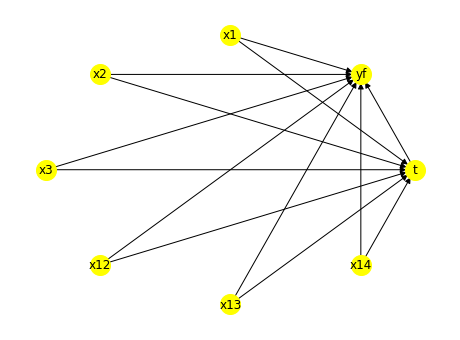

In [24]:
model = CausalModel(
data =df,
treatment = treatment,
outcome = outcome,
common_causes = features,
instruments = None,
effect_modifiers = None)

model.view_model()
display(Images(filename='causal_model.png'))

In [25]:

xs = ""
for i in range(1,26):
    xs += ("x"+str(i)+"+")
 
model=CausalModel(
        data = data,
        treatment='t',
        outcome='y',
        common_causes=xs.split('+')
        )

In [26]:
#Identify the causal effect
identified_estimand = model.identify_effect()

data_1 = data[data["t"]==1]
data_0 = data[data["t"]==0]
print("ATE", np.mean(data_1["y"])- np.mean(data_0["y"]))

estimate = model.estimate_effect(identified_estimand, method_name="backdoor.propensity_score_weighting")

print("Causal Estimate is " + str(estimate.value))

AttributeError: module 'networkx.algorithms' has no attribute 'd_separated'